In [227]:
# WATERSHED ALGORITHM

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
def display(image, cmap='gray'):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')

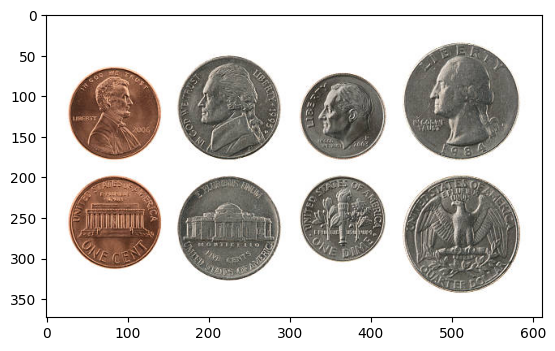

In [229]:
image = cv2.imread('/home/srijanani/GIT/OpenCV/Images/coin.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [230]:
img.shape

(373, 612, 3)

In [231]:
# APPLYING MEADIAN BLUR

img = cv2.medianBlur(img, 15)

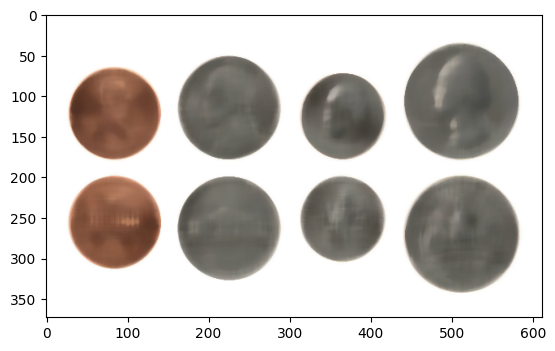

In [232]:
plt.imshow(img)

In [233]:
img.shape

(373, 612, 3)

In [234]:
# CONVERTING INTO GRAY SCALE 

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

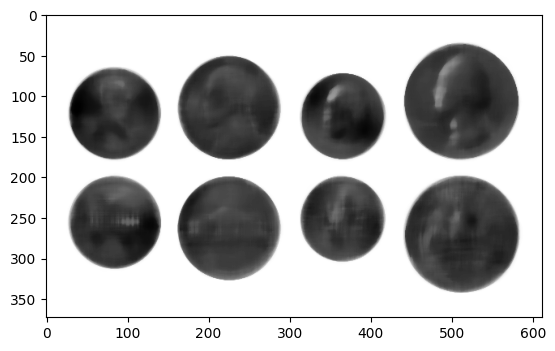

In [235]:
plt.imshow(img, cmap='gray') 

In [236]:
img.shape

(373, 612)

In [237]:
# APPLYING THRESHOLD

# res, sure_bg = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)

# USING OTSU THRESHOLDING METHOD

res, sure_bg = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

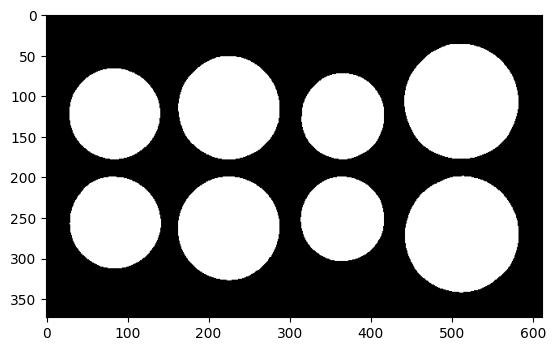

In [238]:
plt.imshow(sure_bg, cmap='gray')

In [239]:
# NOISE REMOVEL (OPTIONAL)

In [240]:
kernal = np.ones((3,3), dtype=np.uint8)

In [241]:
kernal

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [244]:
opening = cv2.morphologyEx(sure_bg, cv2.MORPH_OPEN, kernal, iterations=2)

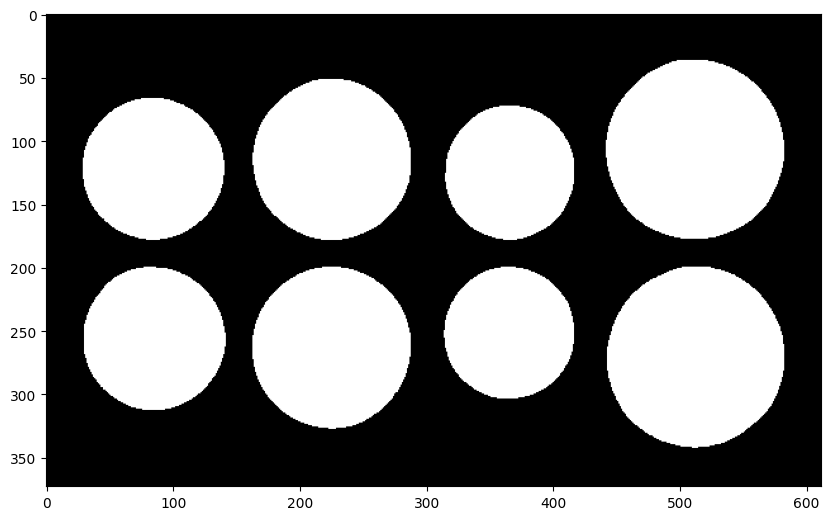

In [245]:
display(opening)

In [246]:
# APPLYING DISTANCE TRANSFORMATION 

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

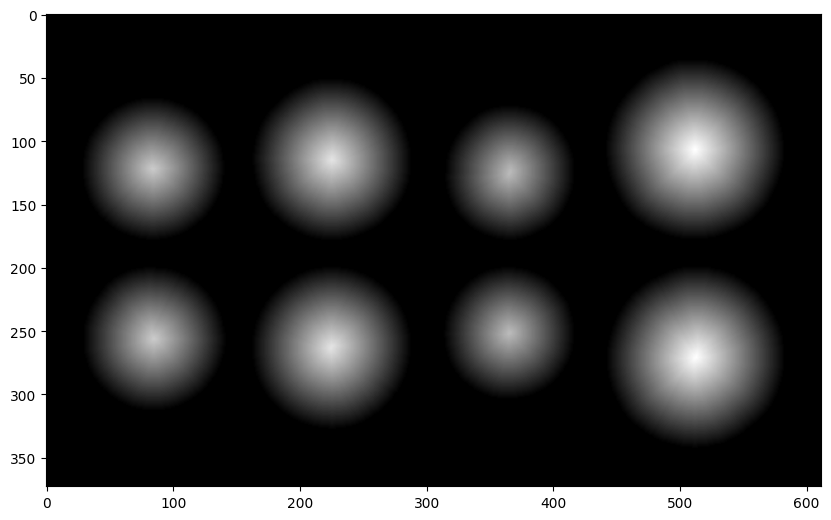

In [247]:
display(dist_transform)

In [248]:
res, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

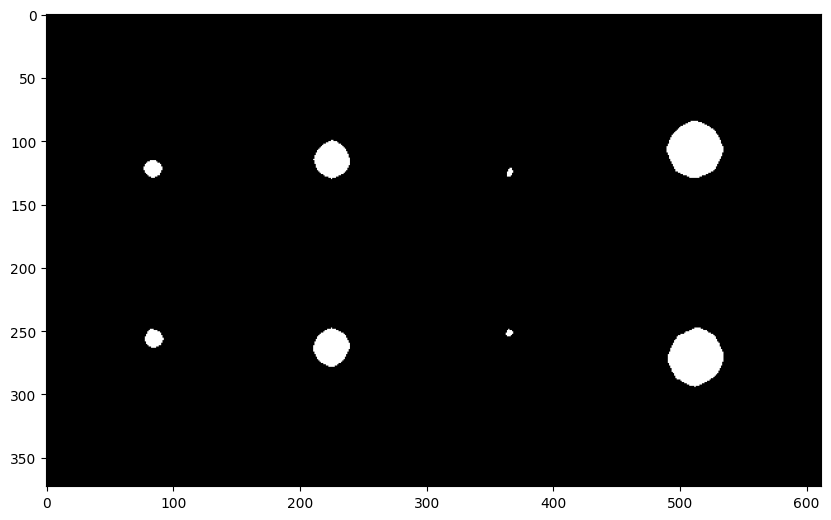

In [249]:
display(sure_fg)

In [250]:
sure_fg = np.uint8(sure_fg)

In [251]:
unknown = cv2.subtract(sure_bg, sure_fg)

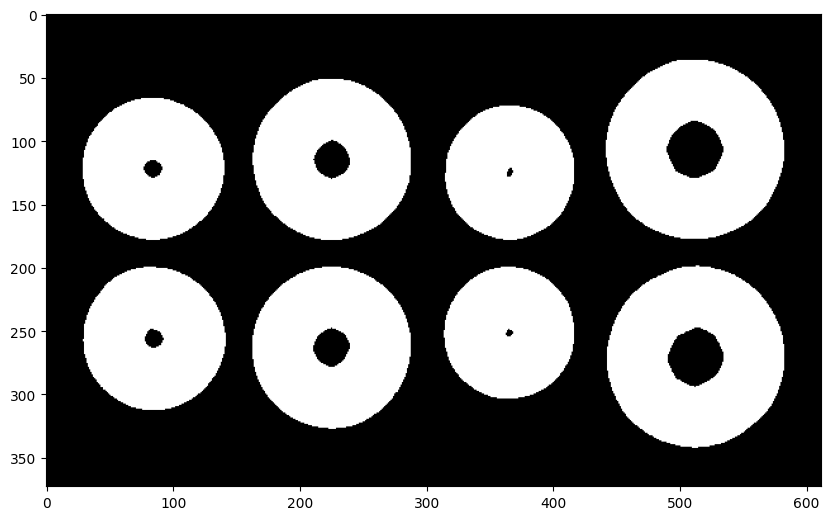

In [252]:
display(unknown)

In [253]:
ret, markers = cv2.connectedComponents(sure_fg)

In [254]:
# display(markers)

# markers = markers.astype(np.int32)

In [255]:
markers = markers + 1

In [256]:
markers[unknown==255] = 0

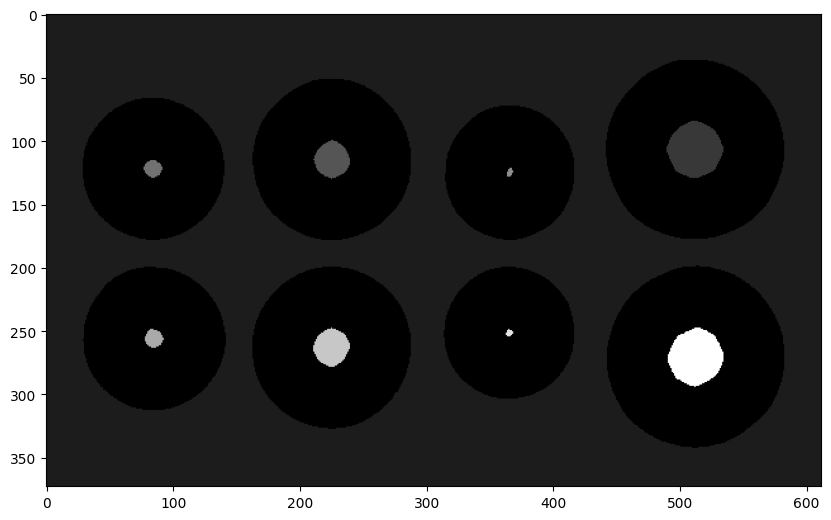

In [257]:
display(markers)

In [258]:
# APPLYING WATERSHED ALGORITHM

markers = cv2.watershed(image, markers)

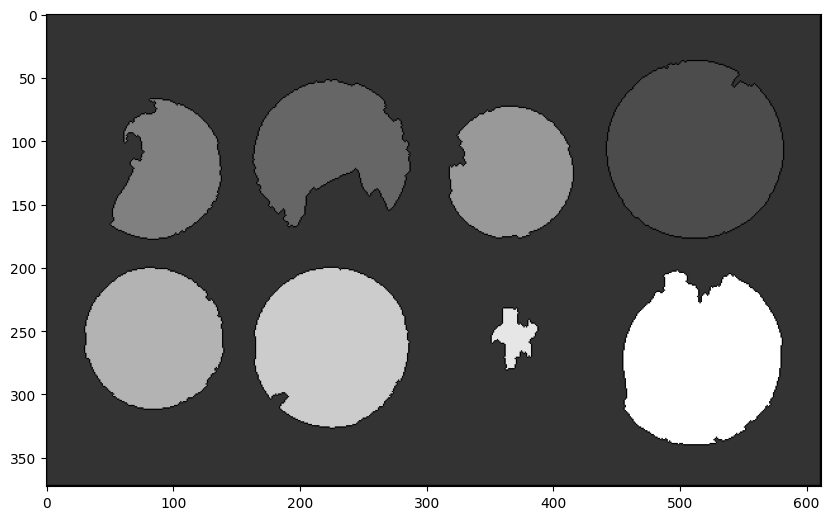

In [259]:
display(markers)

In [261]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [266]:
for i in range(len(contours)):

    if hierarchy[0][i][3] == -1:

        cv2.drawContours(image, contours, i, (255, 0 , 0), 5)

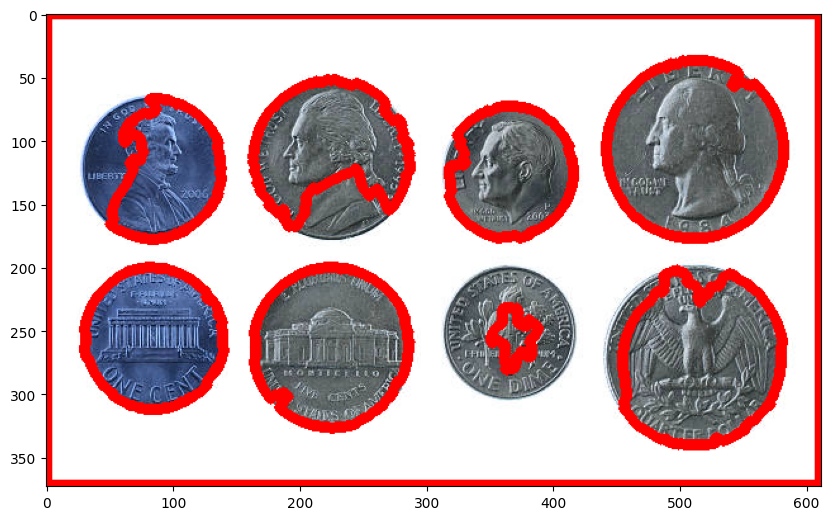

In [267]:
display(image)